In [ ]:
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Pre-Processing Dataset

## Data Cleaning & Transformation


                 Usia Saat Ukur JK  Berat  Tinggi                BB/U    TB/U  \
0    3 Tahun - 2 Bulan - 0 Hari  L  15.20    93.0  Berat Badan Normal  Normal   
1   0 Tahun - 6 Bulan - 17 Hari  L   7.38    67.0  Berat Badan Normal  Normal   
2    4 Tahun - 8 Bulan - 7 Hari  L  16.50   102.2  Berat Badan Normal  Normal   
3   2 Tahun - 0 Bulan - 28 Hari  L  14.30    87.3        Risiko Lebih  Normal   
4   4 Tahun - 1 Bulan - 21 Hari  P  12.90    99.9  Berat Badan Normal  Normal   
5  4 Tahun - 11 Bulan - 22 Hari  P  15.60   102.6  Berat Badan Normal  Normal   
6   2 Tahun - 8 Bulan - 12 Hari  L  17.40    94.2        Risiko Lebih  Normal   
7   2 Tahun - 3 Bulan - 27 Hari  L  11.90    90.0  Berat Badan Normal  Normal   
8    2 Tahun - 4 Bulan - 6 Hari  P  11.00    85.0  Berat Badan Normal  Normal   
9   2 Tahun - 3 Bulan - 28 Hari  P  11.10    82.6  Berat Badan Normal  Normal   

   ZS BB/U  ZS TB/U  
0     0.28    -1.34  
1    -0.90    -0.70  
2    -0.54    -1.27  
3     1.28    -0.20 

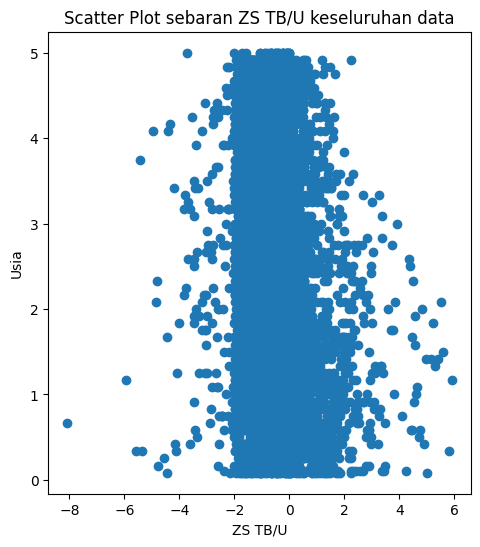

In [ ]:
data = pd.read_csv('Stunting_Dataset.csv')
backupData = data.copy()
selected_columns = ['Usia Saat Ukur', 'JK', 'Berat', 'Tinggi', 'BB/U', 'TB/U', 'ZS BB/U', 'ZS TB/U']
testing_data = data[selected_columns]
print(testing_data.head(10))

# Mengubah label kategorikal dalam kolom 'BB/U' dan 'TB/U' menjadi nilai numerik.
le_bbu = LabelEncoder()
le_tbu = LabelEncoder()
testing_data.loc[:, 'BB/U'] = le_bbu.fit_transform(testing_data['BB/U'])
testing_data.loc[:, 'TB/U'] = le_tbu.fit_transform(testing_data['TB/U'])

print("\n\nIlustrasi Data setelah kategorikal dalam kolom 'BB/U' dan 'TB/U' diubah menjadi numerik:\n")
print(testing_data.head(10))

filtered_data = backupData[selected_columns]

print("\n\nData setelah dilakukan re-assign:\n")
print(filtered_data.head(10))

def convert_age_to_years(age_str):
    parts = age_str.split(' - ')

    years = int(parts[0].split(' ')[0])
    months = int(parts[1].split(' ')[0])
    days = int(parts[2].split(' ')[0])

    if years == 0:
      if months == 0:
        return 0.1
      else:
        return months / 12.0
    else:
      total_months = years * 12 + months
      return total_months / 12.0

testing_data.loc[:, 'Usia Saat Ukur'] = testing_data['Usia Saat Ukur'].apply(convert_age_to_years)
filtered_data.loc[:, 'Usia Saat Ukur'] = filtered_data['Usia Saat Ukur'].apply(convert_age_to_years)

print("\n\nData setelah dilakukan re-assign dan konversi usia:\n")
print(filtered_data.head(100))

tb_u_categories = filtered_data['TB/U'].value_counts()
print("\n\nJumlah anak dengan TB/U dari semua kategori:\n")
print(tb_u_categories)

print("Distribusi kelas sebelum balancing:", Counter(tb_u_categories))

# Visualisasi scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot
plt.scatter(filtered_data['ZS TB/U'], filtered_data['Usia Saat Ukur'], alpha=1)
plt.title('Scatter Plot sebaran ZS TB/U keseluruhan data')
plt.xlabel('ZS TB/U')
plt.ylabel('Usia')

# Menghitung jumlah setiap kategori tinggi (TB/U)
category_counts = filtered_data['TB/U'].value_counts()

# Mencetak hasil jumlah setiap kategori
print("\n\n\nJumlah data untuk setiap kategori TB/U sebelum generate:")
print(category_counts)

print("\n\nDesc Data sebelum generate:")
print(filtered_data.describe())

# --------- --------- --------- --------- --------- --------- --------- --------
# Notes untuk numerizing BB/U:
# Berat Badan Normal = 0
# Kurang = 1
# Resiko Lebih = 2
# Sangat Kurang = 3
# --------- --------- --------- --------- --------- --------- --------- --------
# Notes untuk numerizing TB/U:
# Normal = 0
# Pendek = 1
# Sangat Pendek = 2
# Tinggi = 3
# --------- --------- --------- --------- --------- --------- --------- --------

Balancing Dataset By Generating New Data

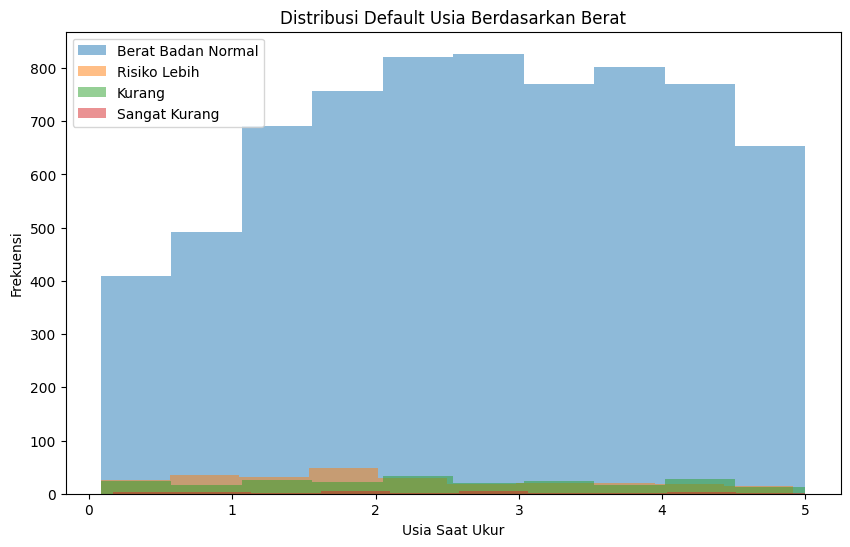

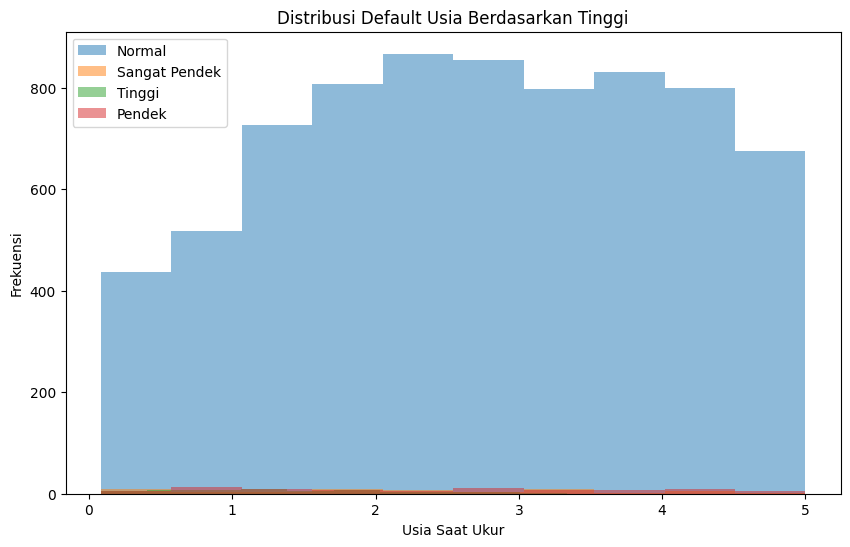

In [ ]:
filtered_data_analisis = filtered_data.copy()

plt.figure(figsize=(10, 6))
for category in filtered_data_analisis['BB/U'].unique():
    category_data = filtered_data_analisis[filtered_data_analisis['BB/U'] == category]
    plt.hist(category_data['Usia Saat Ukur'], alpha=0.5, label=category)

plt.xlabel('Usia Saat Ukur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Default Usia Berdasarkan Berat')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for category in filtered_data_analisis['TB/U'].unique():
    category_data = filtered_data_analisis[filtered_data_analisis['TB/U'] == category]
    plt.hist(category_data['Usia Saat Ukur'], alpha=0.5, label=category)

plt.xlabel('Usia Saat Ukur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Default Usia Berdasarkan Tinggi')
plt.legend()
plt.show()

In [ ]:
filtered_data['Val BB/U'] = filtered_data['Berat'] / filtered_data['Usia Saat Ukur']
filtered_data['Val TB/U'] = filtered_data['Tinggi'] / filtered_data['Usia Saat Ukur']

n = len(filtered_data)

# Hitung total tinggi dan total tinggi kuadrat
def calculate_total(batas_usia, value):
    filtered_subset = filtered_data[
        (filtered_data['Usia Saat Ukur'] <= batas_usia) &
        (filtered_data['Usia Saat Ukur'] > batas_usia - 1)
    ]
    total = 0
    total_squared = 0
    for val in filtered_subset[value]:
        total += val
        total_squared += (val ** 2)
    results = {'total': total, 'total_squared': total_squared}
    return results

tinggi_1 = calculate_total(1, 'Val TB/U')
tinggi_2 = calculate_total(2, 'Val TB/U')
tinggi_3 = calculate_total(3, 'Val TB/U')
tinggi_4 = calculate_total(4, 'Val TB/U')
tinggi_5 = calculate_total(5, 'Val TB/U')

berat_1 = calculate_total(1, 'Val BB/U')
berat_2 = calculate_total(2, 'Val BB/U')
berat_3 = calculate_total(3, 'Val BB/U')
berat_4 = calculate_total(4, 'Val BB/U')
berat_5 = calculate_total(5, 'Val BB/U')

# Hitung rata-rata
mean_tinggi_1 = tinggi_1['total'] / n
mean_tinggi_2 = tinggi_2['total'] / n
mean_tinggi_3 = tinggi_3['total'] / n
mean_tinggi_4 = tinggi_4['total'] / n
mean_tinggi_5 = tinggi_5['total'] / n

mean_berat_1 = berat_1['total'] / n
mean_berat_2 = berat_2['total'] / n
mean_berat_3 = berat_3['total'] / n
mean_berat_4 = berat_4['total'] / n
mean_berat_5 = berat_5['total'] / n

def calculate_mean_std(data, mean_data, total_squared):
    results = {}
    n = len(filtered_data)
    std_value = mt.sqrt(total_squared / n)
    results = {'mean': mean_data, 'std': std_value}
    return results

mean_std_tb_u_1 = calculate_mean_std(filtered_data, mean_tinggi_1, tinggi_1['total_squared'])
mean_std_tb_u_2 = calculate_mean_std(filtered_data, mean_tinggi_2, tinggi_2['total_squared'])
mean_std_tb_u_3 = calculate_mean_std(filtered_data, mean_tinggi_3, tinggi_3['total_squared'])
mean_std_tb_u_4 = calculate_mean_std(filtered_data, mean_tinggi_4, tinggi_4['total_squared'])
mean_std_tb_u_5 = calculate_mean_std(filtered_data, mean_tinggi_5, tinggi_5['total_squared'])

mean_std_bb_u_1 = calculate_mean_std(filtered_data, mean_berat_1, berat_1['total_squared'])
mean_std_bb_u_2 = calculate_mean_std(filtered_data, mean_berat_2, berat_2['total_squared'])
mean_std_bb_u_3 = calculate_mean_std(filtered_data, mean_berat_3, berat_3['total_squared'])
mean_std_bb_u_4 = calculate_mean_std(filtered_data, mean_berat_4, berat_4['total_squared'])
mean_std_bb_u_5 = calculate_mean_std(filtered_data, mean_berat_5, berat_5['total_squared'])

print(f"Mean Tinggi Badan: {mean_std_tb_u_1['mean']:.2f}")
print(f"Standar Deviasi Tinggi Badan: {mean_std_tb_u_1['std']:.2f}")

print(f"\n\n\nMean Tinggi Badan: {mean_std_tb_u_2['mean']:.2f}")
print(f"Standar Deviasi Tinggi Badan: {mean_std_tb_u_2['std']:.2f}")

print(f"\n\n\nMean Tinggi Badan: {mean_std_tb_u_3['mean']:.2f}")
print(f"Standar Deviasi Tinggi Badan: {mean_std_tb_u_3['std']:.2f}")

print(f"\n\n\nMean Tinggi Badan: {mean_std_tb_u_4['mean']:.2f}")
print(f"Standar Deviasi Tinggi Badan: {mean_std_tb_u_4['std']:.2f}")

print(f"\n\n\nMean Tinggi Badan: {mean_std_tb_u_5['mean']:.2f}")
print(f"Standar Deviasi Tinggi Badan: {mean_std_tb_u_5['std']:.2f}")

Mean Tinggi Badan: 25.76
Standar Deviasi Tinggi Badan: 92.94



Mean Tinggi Badan: 11.42
Standar Deviasi Tinggi Badan: 25.16



Mean Tinggi Badan: 8.44
Standar Deviasi Tinggi Badan: 17.51



Mean Tinggi Badan: 6.12
Standar Deviasi Tinggi Badan: 13.06



Mean Tinggi Badan: 4.62
Standar Deviasi Tinggi Badan: 10.35


<ipython-input-4-78b2b3748e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Val BB/U'] = filtered_data['Berat'] / filtered_data['Usia Saat Ukur']
<ipython-input-4-78b2b3748e87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Val TB/U'] = filtered_data['Tinggi'] / filtered_data['Usia Saat Ukur']


In [ ]:
# --------- --------- --------- --------- --------- --------- --------- --------
# Notes untuk numerizing BB/U:
# Berat Badan Normal = 0
# Kurang = 1
# Resiko Lebih = 2
# Sangat Kurang = 3
# --------- --------- --------- --------- --------- --------- --------- --------
# Notes untuk numerizing TB/U:
# Normal = 0
# Pendek = 1
# Sangat Pendek = 2
# Tinggi = 3
# --------- --------- --------- --------- --------- --------- --------- --------

print("Total data sebelum penyeimbangan:", len(filtered_data))

# Pengecekan jumlah anak stunting pada dataset asli
data_stunting = filtered_data[
    (filtered_data['ZS TB/U'] <= -2)
]
n_stunting = len(data_stunting)
print("Jumlah anak yang memiliki tingi badan Pendek dan Sangat Pendek (Terindikasi Stunting) pada Dataset asli: ", n_stunting)

print("\n\nDesc Data sebelum balancing:")
print(filtered_data.describe())

# Jumlah data yang ingin di-generate
n_samples = 1000000

# Menghasilkan gender
gender = ['L'] * 500000 + ['P'] * 500000
np.random.seed(42)
np.random.shuffle(gender)

# Menghasilkan data acak untuk usia
usia_saat_ukur = np.random.uniform(1.0, 5.0, n_samples)

# Inisialisasi berat dan tinggi berdasarkan gender dan usia
berat = []
tinggi = []
zs_bb_u = []
zs_tb_u = []

# Menentukan berat dan tinggi berdasarkan usia dan gender
for i in range(n_samples):
    age = usia_saat_ukur[i]
    g = gender[i]

    if g == 'L':
        if age >= 1 and age < 2:
            b = np.random.normal(loc=12, scale=1)
            t = np.random.normal(loc=85, scale=5)
            std_bb = mean_std_bb_u_2['std']
            std_tb = mean_std_tb_u_2['std']
        elif age < 3:
            b = np.random.normal(loc=14, scale=1)
            t = np.random.normal(loc=90, scale=5)
            std_bb = mean_std_bb_u_3['std']
            std_tb = mean_std_tb_u_3['std']
        elif age < 4:
            b = np.random.normal(loc=16, scale=1)
            t = np.random.normal(loc=95, scale=5)
            std_bb = mean_std_bb_u_4['std']
            std_tb = mean_std_tb_u_4['std']
        else:
            b = np.random.normal(loc=18, scale=1)
            t = np.random.normal(loc=100, scale=5)
            std_bb = mean_std_bb_u_5['std']
            std_tb = mean_std_tb_u_5['std']

    else:
        if age >= 1 and age < 2:
            b = np.random.normal(loc=11, scale=1)
            t = np.random.normal(loc=83, scale=5)
            std_bb = mean_std_bb_u_2['std']
            std_tb = mean_std_tb_u_2['std']
        elif age < 3:
            b = np.random.normal(loc=13, scale=1)
            t = np.random.normal(loc=88, scale=5)
            std_bb = mean_std_bb_u_3['std']
            std_tb = mean_std_tb_u_3['std']
        elif age < 4:
            b = np.random.normal(loc=15, scale=1)
            t = np.random.normal(loc=93, scale=5)
            std_bb = mean_std_bb_u_4['std']
            std_tb = mean_std_tb_u_4['std']
        else:
            b = np.random.normal(loc=17, scale=1)
            t = np.random.normal(loc=98, scale=5)
            std_bb = mean_std_bb_u_5['std']
            std_tb = mean_std_tb_u_5['std']

    # Menambahkan berat dan tinggi ke list
    berat.append(b)
    tinggi.append(t)

    # Menghitung Z-Score untuk Berat Badan
    if g == 'L':
        zs_bb_u.append((b - (12 if age < 2 else
                              14 if age < 3 else
                              16 if age < 4 else
                              18)) / (1))
    else:
        zs_bb_u.append((b - (11 if age < 2 else
                              13 if age < 3 else
                              15 if age < 4 else
                              17)) / (1))

    # Menghitung Z-Score untuk Tinggi Badan
    if g == 'L':
        zs_tb_u.append((t - (85 if age < 2 else
                              90 if age < 3 else
                              95 if age < 4 else
                              100)) / (5))
    else:
        zs_tb_u.append((t - (83 if age < 2 else
                              88 if age < 3 else
                              93 if age < 4 else
                              98)) / (5))

# Inisialisasi kategori BB/U dan TB/U
bb_u = []
tb_u = []

# Menentukan kategori BB/U dan TB/U berdasarkan Z-Score
for i in range(n_samples):
    z_score_bb = zs_bb_u[i]
    z_score_tb = zs_tb_u[i]

    # Kategori BB/U berdasarkan Z-Score
    if z_score_bb < -2:
        bb_u.append('Sangat Kurang')
    elif z_score_bb < -1:
        bb_u.append('Kurang')
    else:
        bb_u.append('Berat Badan Normal')

    # Kategori TB/U berdasarkan Z-Score
    if z_score_tb < -2:
        tb_u.append('Sangat Pendek')
    elif z_score_tb < -1:
        tb_u.append('Pendek')
    else:
        tb_u.append('Normal')

# Membuat DataFrame
data_generated = pd.DataFrame({
    'Usia Saat Ukur': usia_saat_ukur,
    'Berat': berat,
    'Tinggi': tinggi,
    'JK': gender,
    'ZS BB/U': zs_bb_u,
    'ZS TB/U': zs_tb_u,
    'BB/U': bb_u,
    'TB/U': tb_u,
})

data_generated['Val BB/U'] = data_generated['Berat'] / data_generated['Usia Saat Ukur']
data_generated['Val TB/U'] = data_generated['Tinggi'] / data_generated['Usia Saat Ukur']

generated_data = pd.concat([filtered_data.reset_index(drop=True), data_generated.reset_index(drop=True)], ignore_index=True)

print("\n\nTotal data setelah penyeimbangan:", len(generated_data))

print("\n\nDesc Data setelah generate:")
print(generated_data.describe())

print(generated_data.tail())

Total data sebelum penyeimbangan: 7506
Jumlah anak yang memiliki tingi badan Pendek dan Sangat Pendek (Terindikasi Stunting) pada Dataset asli:  153


Desc Data sebelum balancing:
             Berat       Tinggi      ZS BB/U      ZS TB/U
count  7506.000000  7506.000000  7506.000000  7506.000000
mean     12.560721    89.838582    -0.476759    -0.411649
std       3.233782    12.686359     0.853890     1.018525
min       2.690000    46.000000    -4.880000    -8.070000
25%      10.400000    82.000000    -1.000000    -1.090000
50%      12.900000    91.400000    -0.400000    -0.350000
75%      15.000000   100.000000     0.020000     0.110000
max      36.000000   120.000000     4.670000     5.900000


Total data setelah penyeimbangan: 1007506


Desc Data setelah generate:
              Berat        Tinggi       ZS BB/U       ZS TB/U
count  1.007506e+06  1.007506e+06  1.007506e+06  1.007506e+06
mean   1.448310e+01  9.148701e+01 -3.870153e-03 -2.122761e-03
std    2.510498e+00  7.611943e+00  9.9

In [ ]:
# Jumlah total data setelah penyeimbangan
print("Total data setelah penyeimbangan:", len(generated_data))

generated_data = generated_data[selected_columns]

# Cetak beberapa baris dari data yang seimbang
print("\n\nLampiran dataset setelah dilakukan generate data baru:\n")
print(generated_data.tail(100))
print("\n")

normal_tb_u_data = generated_data[(generated_data['TB/U'] == 'Normal') &
                                  (generated_data['Usia Saat Ukur'] >= 1) &
                                  (generated_data['Usia Saat Ukur'] <= 5)]

pendek_tb_u_data = generated_data[(generated_data['TB/U'] == 'Pendek') &
                                  (generated_data['Usia Saat Ukur'] >= 1) &
                                  (generated_data['Usia Saat Ukur'] <= 5)]

spendek_tb_u_data = generated_data[(generated_data['TB/U'] == 'Sangat Pendek') &
                                  (generated_data['Usia Saat Ukur'] >= 1) &
                                  (generated_data['Usia Saat Ukur'] <= 5)]

if len(normal_tb_u_data) > 700000:
    normal_tb_u_data_sampled = normal_tb_u_data.sample(n=700000, random_state=42)
else:
    normal_tb_u_data_sampled = normal_tb_u_data

# Menghilangkan entitas yang telah dipotong dari generated_data
balanced_data = generated_data[~generated_data.index.isin(normal_tb_u_data_sampled.index)]

print("\n\nDesc Data:")
print(balanced_data.describe())

tb_u_categories = generated_data['TB/U'].value_counts()
print("\n\nJumlah anak dengan TB/U dari semua kategori sebelum balancing:\n")
print(tb_u_categories)

tb_u_categories = balanced_data['TB/U'].value_counts()
print("\n\nJumlah anak dengan TB/U dari semua kategori setelah balancing:\n")
print(tb_u_categories)

Total data setelah penyeimbangan: 1007506


Lampiran dataset setelah dilakukan generate data baru:

        Usia Saat Ukur JK      Berat      Tinggi                BB/U  \
1007406        2.11007  P  13.298598   74.254839  Berat Badan Normal   
1007407       3.658912  L  15.593322   94.275085  Berat Badan Normal   
1007408       4.690308  L  17.389628   95.389479  Berat Badan Normal   
1007409       4.979032  L  17.624072  104.167950  Berat Badan Normal   
1007410       3.653086  L  16.285765   90.660047  Berat Badan Normal   
...                ... ..        ...         ...                 ...   
1007501       2.917353  L  12.452061   86.925026              Kurang   
1007502       3.803891  L  16.524373  107.141544  Berat Badan Normal   
1007503       2.104722  L  14.423923  101.294728  Berat Badan Normal   
1007504       4.675693  P  17.978292  102.640472  Berat Badan Normal   
1007505       3.006667  L  13.841569   88.209141       Sangat Kurang   

                  TB/U   ZS BB/U   

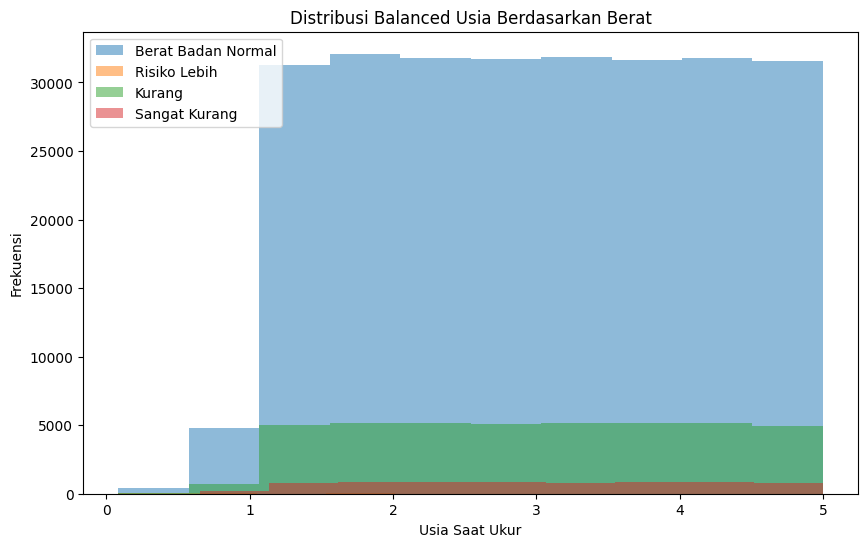

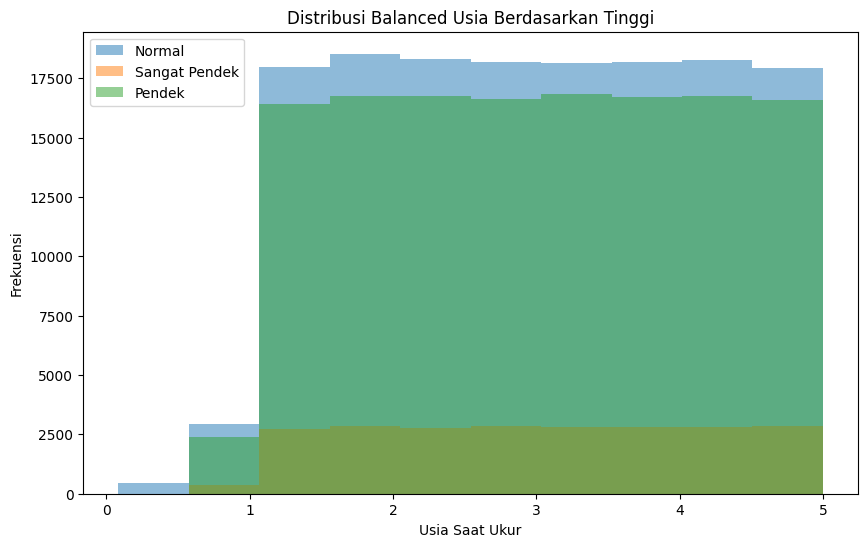

In [ ]:
balanced_data_analisis = balanced_data.copy()

balanced_data_analisis.loc[
    (balanced_data_analisis["ZS TB/U"] > 0) &
    (balanced_data_analisis["TB/U"] != 'Pendek')&
    (balanced_data_analisis["TB/U"] != 'Sangat Pendek'),
    "TB/U"
] = 'Normal'

# Histogram untuk melihat distribusi usia berdasarkan berat dan tinggi
plt.figure(figsize=(10, 6))
for category in balanced_data_analisis['BB/U'].unique():
    category_data = balanced_data_analisis[balanced_data_analisis['BB/U'] == category]
    plt.hist(category_data['Usia Saat Ukur'], alpha=0.5, label=category)

plt.xlabel('Usia Saat Ukur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Balanced Usia Berdasarkan Berat')
plt.legend()
plt.show()

# Histogram untuk melihat distribusi usia berdasarkan tinggi
plt.figure(figsize=(10, 6))
for category in balanced_data_analisis['TB/U'].unique():
    category_data = balanced_data_analisis[balanced_data_analisis['TB/U'] == category]
    plt.hist(category_data['Usia Saat Ukur'], alpha=0.5, label=category)

plt.xlabel('Usia Saat Ukur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Balanced Usia Berdasarkan Tinggi')
plt.legend()
plt.show()

Text(0, 0.5, 'Usia Saat Ukur')

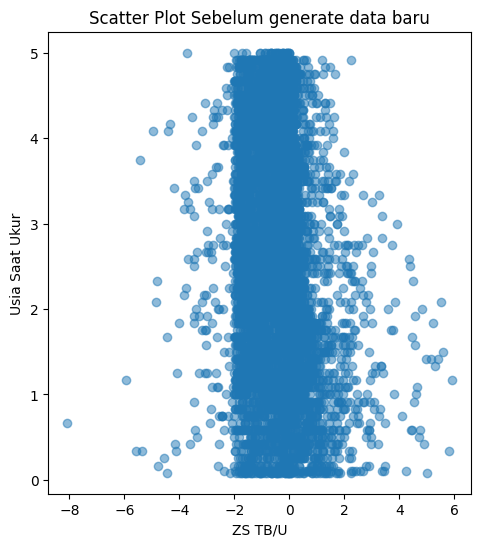

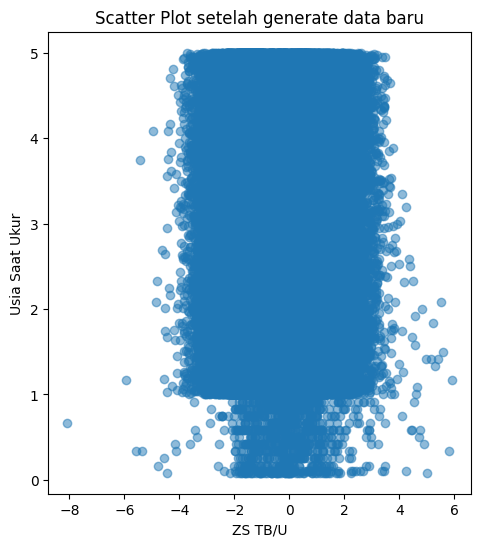

In [ ]:
# Filter data untuk rentang usia 1-2 tahun sebelum pemecahan
filtered_data_before_split = filtered_data[
    (filtered_data['Usia Saat Ukur'] > 0) &
    (filtered_data['Usia Saat Ukur'] <= 5)
]

# Visualisasi scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot
plt.scatter(filtered_data_before_split['ZS TB/U'], filtered_data_before_split['Usia Saat Ukur'], alpha=0.5)
plt.title('Scatter Plot Sebelum generate data baru')
plt.xlabel('ZS TB/U')
plt.ylabel('Usia Saat Ukur')

# Filter data untuk rentang usia 1-2 tahun sebelum pemecahan
filtered_data_before_split = balanced_data[
    (balanced_data['Usia Saat Ukur'] > 0) &
    (balanced_data['Usia Saat Ukur'] <= 5)
]

# Visualisasi scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(filtered_data_before_split['ZS TB/U'], filtered_data_before_split['Usia Saat Ukur'], alpha=0.5)
plt.title('Scatter Plot setelah generate data baru')
plt.xlabel('ZS TB/U')
plt.ylabel('Usia Saat Ukur')

# --------- --------- --------- --------- --------- --------- --------- --------
# Notes untuk numerizing TB/U:
# Normal = 0
# Pendek = 1
# Sangat Pendek = 2
# Tinggi = 3
# --------- --------- --------- --------- --------- --------- --------- --------

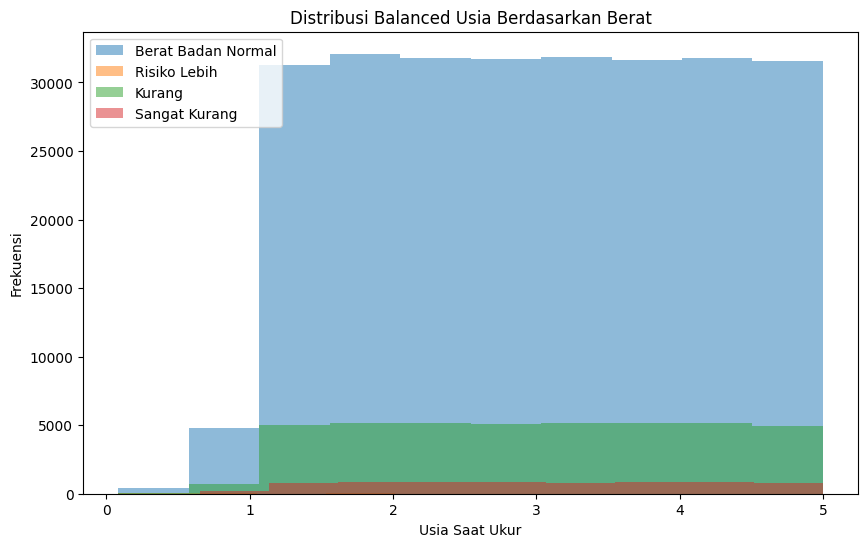

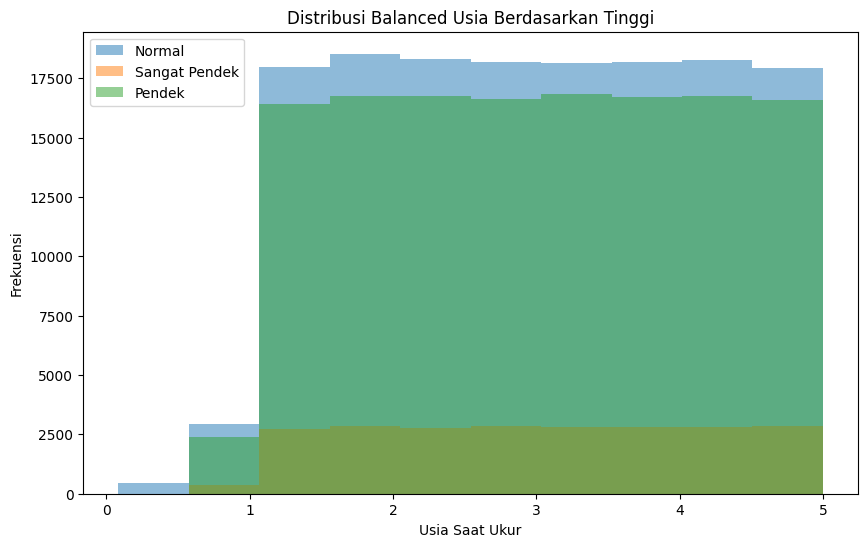

In [ ]:
# Histogram untuk melihat distribusi usia berdasarkan berat dan tinggi
plt.figure(figsize=(10, 6))
for category in balanced_data_analisis['BB/U'].unique():
    category_data = balanced_data_analisis[balanced_data_analisis['BB/U'] == category]
    plt.hist(category_data['Usia Saat Ukur'], alpha=0.5, label=category)

plt.xlabel('Usia Saat Ukur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Balanced Usia Berdasarkan Berat')
plt.legend()
plt.show()

# Histogram untuk melihat distribusi usia berdasarkan tinggi
plt.figure(figsize=(10, 6))
for category in balanced_data_analisis['TB/U'].unique():
    category_data = balanced_data_analisis[balanced_data_analisis['TB/U'] == category]
    plt.hist(category_data['Usia Saat Ukur'], alpha=0.5, label=category)

plt.xlabel('Usia Saat Ukur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Balanced Usia Berdasarkan Tinggi')
plt.legend()
plt.show()

In [ ]:
# Menghitung jumlah setiap kategori tinggi (TB/U)
category_counts = balanced_data_analisis['TB/U'].value_counts()

# Mencetak hasil jumlah setiap kategori
print("\n\n\nJumlah data untuk setiap kategori TB/U:")
print(category_counts)

# Menghitung jumlah setiap kategori tinggi (TB/U)
category_counts = generated_data['TB/U'].value_counts()

# Mencetak hasil jumlah setiap kategori
print("\n\n\nJumlah data untuk setiap kategori TB/U Imbalanced:")
print(category_counts)




Jumlah data untuk setiap kategori TB/U:
TB/U
Normal           148865
Pendek           135825
Sangat Pendek     22816
Name: count, dtype: int64



Jumlah data untuk setiap kategori TB/U Imbalanced:
TB/U
Normal           848811
Pendek           135825
Sangat Pendek     22816
Tinggi               54
Name: count, dtype: int64


## Data Splitting


### Balanced

In [ ]:
split_data = balanced_data_analisis.copy()

ranges_umur = [(0.0, 1.0), (1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0)]

# Inisialisasi lists kosong untuk menyimpan subset-data
train_subset_lists = []
test_subset_lists = []

# Iterasi melalui setiap rentang umur
for start_range, end_range in ranges_umur:
    # Filter data berdasarkan rentang usia saat ini
    for tb_u_category in split_data['TB/U'].unique():
        temp_split_data = split_data[
            (start_range <= split_data['Usia Saat Ukur']) &
            (split_data['Usia Saat Ukur'] <= end_range) &
            (split_data['TB/U'] == tb_u_category)
        ]

        # Bagi data menjadi 90% untuk latihan dan 10% untuk tes
        train_size = int(len(temp_split_data) * 0.9)
        test_size = len(temp_split_data) - train_size

        train_temp_subset = temp_split_data.head(train_size)
        test_temp_subset = temp_split_data.tail(test_size)

        # Simpan subset-data ke dalam list
        train_subset_lists.append(train_temp_subset)
        test_subset_lists.append(test_temp_subset)

# Concatenate subset-data untuk membuat dataframe final
combined_train_dataframe = pd.concat(train_subset_lists)
combined_test_dataframe = pd.concat(test_subset_lists)

# Hitung jumlah kategori TB/U pada data training dan testing
category_counts_train = combined_train_dataframe['TB/U'].value_counts()
print("\n\nJumlah data untuk setiap kategori TB/U pada Train Data:")
print(category_counts_train)

category_counts_test = combined_test_dataframe['TB/U'].value_counts()
print("\n\nJumlah data untuk setiap kategori TB/U pada Test Data:")
print(category_counts_test)



Jumlah data untuk setiap kategori TB/U pada Train Data:
TB/U
Normal           134075
Pendek           122247
Sangat Pendek     20532
Name: count, dtype: int64


Jumlah data untuk setiap kategori TB/U pada Test Data:
TB/U
Normal           14899
Pendek           13585
Sangat Pendek     2285
Name: count, dtype: int64


In [ ]:
print("\n\nLampiran traing dataset:\n")
print(combined_train_dataframe.head(100000))
print("\n")

print("\n\nLampiran test dataset:\n")
print(combined_test_dataframe.head(100000))
print("\n")



Lampiran traing dataset:

       Usia Saat Ukur JK      Berat     Tinggi                BB/U    TB/U  \
1                 0.5  L   7.380000  67.000000  Berat Badan Normal  Normal   
11               0.25  P   6.100000  59.000000  Berat Badan Normal  Normal   
12           0.583333  L   8.130000  72.000000  Berat Badan Normal  Normal   
18           0.333333  L   5.820000  61.000000  Berat Badan Normal  Normal   
21           0.333333  L   7.480000  62.000000  Berat Badan Normal  Normal   
...               ... ..        ...        ...                 ...     ...   
817050         2.4406  L  12.689132  97.892139              Kurang  Normal   
817085       2.725396  P  12.968871  87.595428  Berat Badan Normal  Normal   
817091       2.408305  P  13.188670  86.556506  Berat Badan Normal  Normal   
817100       2.843803  L  14.211684  97.233154  Berat Badan Normal  Normal   
817129       2.669855  P  12.792226  87.013161  Berat Badan Normal  Normal   

         ZS BB/U   ZS TB/U  
1     

In [ ]:
train_balance = combined_train_dataframe.copy()
test_balance = combined_test_dataframe.copy()

### Imbalanced

In [ ]:
split_data = generated_data.copy()

ranges_umur = [(0.0, 1.0), (1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0)]

# Inisialisasi lists kosong untuk menyimpan subset-data
train_subset_lists = []
test_subset_lists = []

# Iterasi melalui setiap rentang umur
for start_range, end_range in ranges_umur:
    # Filter data berdasarkan rentang usia saat ini
    for tb_u_category in split_data['TB/U'].unique():
        temp_split_data = split_data[
            (start_range <= split_data['Usia Saat Ukur']) &
            (split_data['Usia Saat Ukur'] <= end_range) &
            (split_data['TB/U'] == tb_u_category)
        ]

        # Bagi data menjadi 90% untuk latihan dan 10% untuk tes
        train_size = int(len(temp_split_data) * 0.9)
        test_size = len(temp_split_data) - train_size

        train_temp_subset = temp_split_data.head(train_size)
        test_temp_subset = temp_split_data.tail(test_size)

        # Simpan subset-data ke dalam list
        train_subset_lists.append(train_temp_subset)
        test_subset_lists.append(test_temp_subset)

# Concatenate subset-data untuk membuat dataframe final
combined_train_dataframe = pd.concat(train_subset_lists)
combined_test_dataframe = pd.concat(test_subset_lists)

# Hitung jumlah kategori TB/U pada data training dan testing
category_counts_train = combined_train_dataframe['TB/U'].value_counts()
print("\n\nJumlah data untuk setiap kategori TB/U pada Train Data:")
print(category_counts_train)

category_counts_test = combined_test_dataframe['TB/U'].value_counts()
print("\n\nJumlah data untuk setiap kategori TB/U pada Test Data:")
print(category_counts_test)



Jumlah data untuk setiap kategori TB/U pada Train Data:
TB/U
Normal           764422
Pendek           122247
Sangat Pendek     20532
Tinggi               50
Name: count, dtype: int64


Jumlah data untuk setiap kategori TB/U pada Test Data:
TB/U
Normal           84939
Pendek           13585
Sangat Pendek     2285
Tinggi               9
Name: count, dtype: int64


In [ ]:
print("\n\nLampiran traing dataset:\n")
print(combined_train_dataframe.head(100000))
print("\n")

print("\n\nLampiran test dataset:\n")
print(combined_test_dataframe.head(100000))
print("\n")



Lampiran traing dataset:

       Usia Saat Ukur JK      Berat     Tinggi                BB/U    TB/U  \
1                 0.5  L   7.380000  67.000000  Berat Badan Normal  Normal   
11               0.25  P   6.100000  59.000000  Berat Badan Normal  Normal   
12           0.583333  L   8.130000  72.000000  Berat Badan Normal  Normal   
18           0.333333  L   5.820000  61.000000  Berat Badan Normal  Normal   
21           0.333333  L   7.480000  62.000000  Berat Badan Normal  Normal   
...               ... ..        ...        ...                 ...     ...   
470941       1.981445  L  13.520223  81.062092  Berat Badan Normal  Normal   
470943       1.336665  P  10.462864  80.810039  Berat Badan Normal  Normal   
470945       1.218609  L  11.492715  83.897328  Berat Badan Normal  Normal   
470947       1.619115  L  12.694940  84.706348  Berat Badan Normal  Normal   
470948       1.339216  L  11.957213  87.933311  Berat Badan Normal  Normal   

         ZS BB/U   ZS TB/U  
1     

In [ ]:
train_imbalance = combined_train_dataframe.copy()
test_imbalance = combined_test_dataframe.copy()

# Modelling

## Boosting_AdaBoost with KNN as the base estimator/weak classifier/base classifier

In [ ]:
#AdaBoost with KNN as the base estimator/weak classifier/base classifier

# 1. Fungsi untuk memberikan pembobotan terhadap masing-masing entitas pada sample
def sample_weighting(sample):
    m = len(sample)
    weight_value = 1 / m
    sample['bobot classifier'] = weight_value
    return sample

def reweighting_samples(X, y_true, model):
    y_pred = model.predict(X)

    m = len(y_true)

    weights = X['bobot classifier'].values.copy()

    print('\n\nsample:')
    print(y_true)

    print('\n\nhasil tebakan:')
    print(y_pred)

    # Pembobotan ulang berdasarkan kesalahan prediksi
    for i in range(m):
        if y_pred[i] != y_true.values[i]:
            weights[i] *= 10
        else:
            weights[i] *= 1

    # Update kolom bobot di DataFrame X
    X['bobot classifier'] = weights

    # Evaluasi model
    # Menghitung akurasi per kelas
    report = classification_report(y_true, y_pred, output_dict=True)

    # Membuat DataFrame untuk menyajikan hasil akurasi per kelas
    accuracy_per_class = pd.DataFrame(report).transpose()

    print("\n\nAkurasi:")
    print(accuracy_per_class[['precision', 'recall', 'f1-score', 'support']])

    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\n\ncfs mtrx::")
    print(conf_matrix)
    print("\n\n")

    return X, accuracy_per_class, conf_matrix

# 2. Fungsi untuk Melatih Estimator Lemah (KNN dalam Kasus Ini)
def train_weak_learner(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    updated_sample, report, conf_matrix = reweighting_samples(X_test, y_test, knn)

    return knn, updated_sample, report, conf_matrix

# 3. Implementasi Boosting
def boosted_knn(X_train, X_test, y_train, y_test, n_estimators):
    estimators = []
    estimator_weights = []
    y_train = y_train.reset_index(drop=True)

    for k in range(n_estimators):
        print('\n\nIterasi ke:',k+1)

        # Latih estimator lemah
        estimator, updated_weights, report, conf_matrix = train_weak_learner(X_train, X_test, y_train, y_test)
        estimators.append(estimator)
        print(estimator)
        print(updated_weights)

        # Hitung bobot estimator
        estimator_weights.append(updated_weights)

    return estimators[-1], estimator_weights[-1], report, conf_matrix

# 4. Penggunaan
backupData_train = train_balance.copy()
backupData_test = test_balance.copy()
weighted_train = sample_weighting(backupData_train)
weighted_test = sample_weighting(backupData_test)
print(weighted_train)
print(weighted_test)

selected_columns_x = ['Usia Saat Ukur', 'Berat', 'Tinggi', 'bobot classifier']
selected_columns_y = ['TB/U']
X_train = weighted_train[selected_columns_x]
y_train = weighted_train[selected_columns_y]
X_test = weighted_test[selected_columns_x]
y_test = weighted_test[selected_columns_y]

n_estimators = 50  # Sesuaikan jumlah estimator sesuai kebutuhan
estimators, estimator_weights, report, conf_matrix = boosted_knn(X_train, X_test, y_train, y_test, n_estimators)

       Usia Saat Ukur JK      Berat     Tinggi                BB/U    TB/U  \
1                 0.5  L   7.380000  67.000000  Berat Badan Normal  Normal   
11               0.25  P   6.100000  59.000000  Berat Badan Normal  Normal   
12           0.583333  L   8.130000  72.000000  Berat Badan Normal  Normal   
18           0.333333  L   5.820000  61.000000  Berat Badan Normal  Normal   
21           0.333333  L   7.480000  62.000000  Berat Badan Normal  Normal   
...               ... ..        ...        ...                 ...     ...   
906956       4.438811  L  17.975869  91.542858  Berat Badan Normal  Pendek   
906982       4.299262  P  18.361395  88.521425  Berat Badan Normal  Pendek   
906985       4.795795  P  15.507855  90.657442              Kurang  Pendek   
907077       4.038836  L  17.141409  92.815385  Berat Badan Normal  Pendek   
907122       4.790453  P  16.075525  92.443660  Berat Badan Normal  Pendek   

         ZS BB/U   ZS TB/U  bobot classifier  
1      -0.900000

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968264  0.944023  0.955990  14899.000000
Pendek          0.908155  0.941848  0.924695  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932172  0.932172  0.932172      0.932172
macro avg       0.907429  0.894415  0.900530  30769.000000
weighted avg    0.932635  0.932172  0.932141  30769.000000


cfs mtrx::
[[14065   834     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.968266  0.944090  0.956025  14899.000000
Pendek          0.908220  0.941848  0.924728  13585.000000
Sangat Pendek   0.845868  0.797374  0.820906   2285.000000
accuracy        0.932204  0.932204  0.932204      0.932204
macro avg       0.907451  0.894437  0.900553  30769.000000
weighted avg    0.932665  0.932204  0.932173  30769.000000


cfs mtrx::
[[14066   833     0]
 [  458 12795   332]
 [    3   460  1822]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.971509  0.945231  0.958190  14899.000000
Pendek          0.910430  0.946485  0.928107  13585.000000
Sangat Pendek   0.852558  0.802188  0.826607   2285.000000
accuracy        0.935162  0.935162  0.935162      0.935162
macro avg       0.911499  0.897968  0.904301  30769.000000
weighted avg    0.935708  0.935162  0.935136  30769.000000


cfs mtrx::
[[14083   816     0]
 [  410 12858   317]
 [    3   449  1833]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score      support
Normal          0.989088  0.961205  0.974947  14899.00000
Pendek          0.935414  0.979757  0.957072  13585.00000
Sangat Pendek   0.942261  0.849891  0.893695   2285.00000
accuracy        0.961130  0.961130  0.961130      0.96113
macro avg       0.955587  0.930284  0.941905  30769.00000
weighted avg    0.961912  0.961130  0.961021  30769.00000


cfs mtrx::
[[14321   578     0]
 [  156 13310   119]
 [    2   341  1942]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299315  17

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score      support
Normal          0.989173  0.987247  0.988209  14899.00000
Pendek          0.970746  0.986824  0.978719  13585.00000
Sangat Pendek   0.977501  0.893654  0.933699   2285.00000
accuracy        0.980110  0.980110  0.980110      0.98011
macro avg       0.979140  0.955908  0.966876  30769.00000
weighted avg    0.980170  0.980110  0.979971  30769.00000


cfs mtrx::
[[14709   189     1]
 [  133 13406    46]
 [   28   215  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299315  17

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.973275  0.999732  0.986326  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   0.991744  0.893654  0.940147   2285.000000
accuracy        0.986155  0.986155  0.986155      0.986155
macro avg       0.988340  0.960070  0.973280  30769.000000
weighted avg    0.986446  0.986155  0.986006  30769.000000


cfs mtrx::
[[14895     0     4]
 [  166 13406    13]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




sample:
           TB/U
6843     Normal
6853     Normal
6855     Normal
6859     Normal
6880     Normal
...         ...
1007392  Pendek
1007394  Pendek
1007398  Pendek
1007433  Pendek
1007470  Pendek

[30769 rows x 1 columns]


hasil tebakan:
['Normal' 'Normal' 'Normal' ... 'Pendek' 'Pendek' 'Pendek']


<ipython-input-17-ee50e7f2c4e0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bobot classifier'] = weights




Akurasi:
               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000
Sangat Pendek   1.000000  0.893654  0.943841   2285.000000
accuracy        0.986285  0.986285  0.986285      0.986285
macro avg       0.990819  0.960159  0.974415  30769.000000
weighted avg    0.986663  0.986285  0.986140  30769.000000


cfs mtrx::
[[14899     0     0]
 [  179 13406     0]
 [  243     0  2042]]



KNeighborsClassifier(n_neighbors=3)
        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299

# Validating

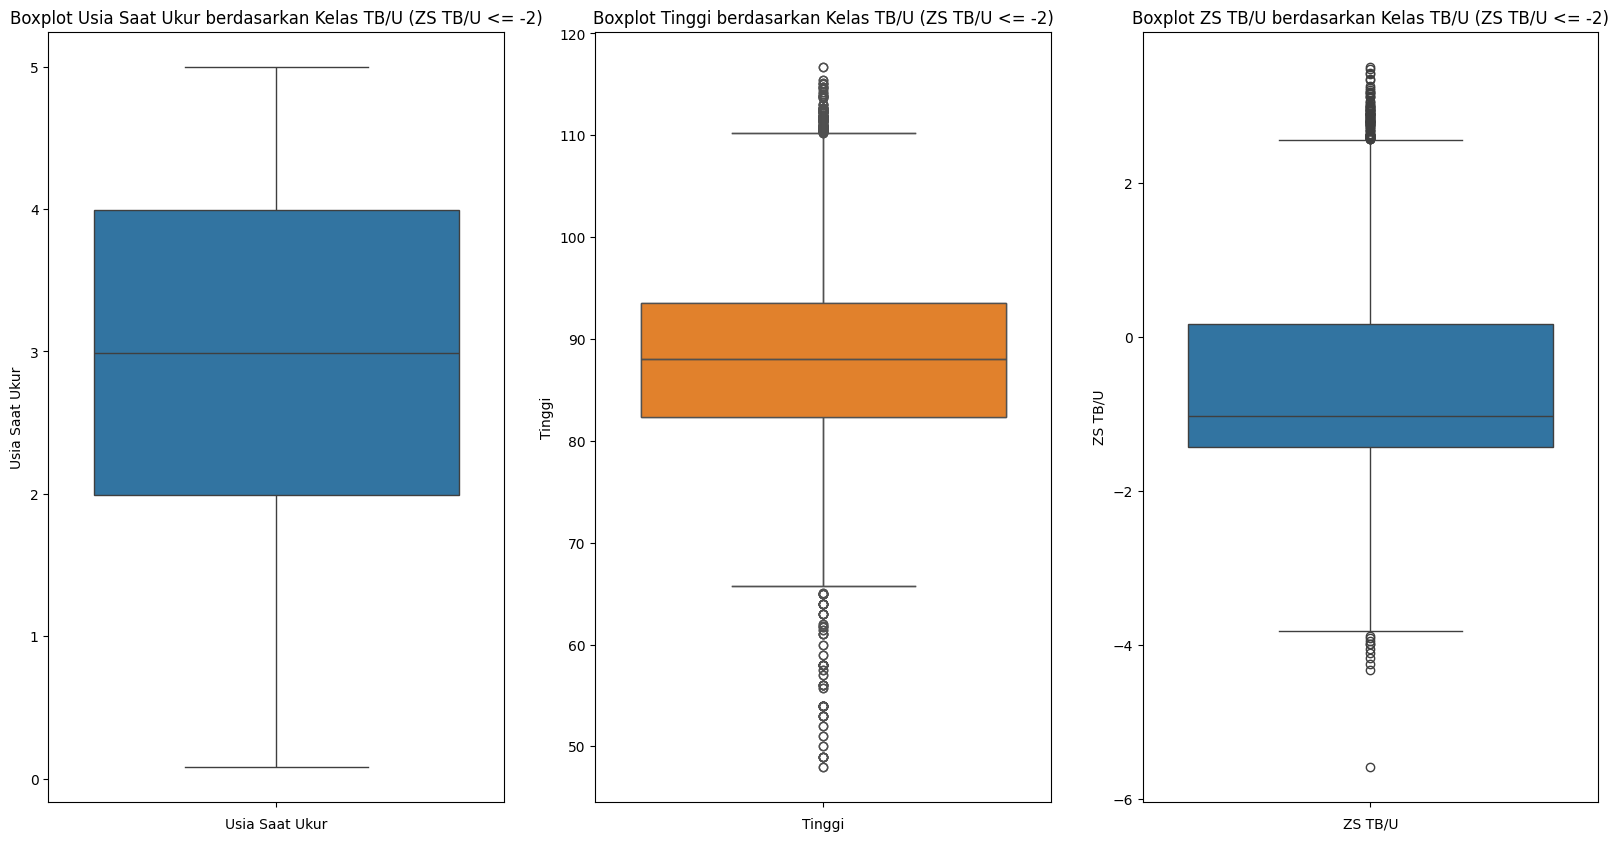

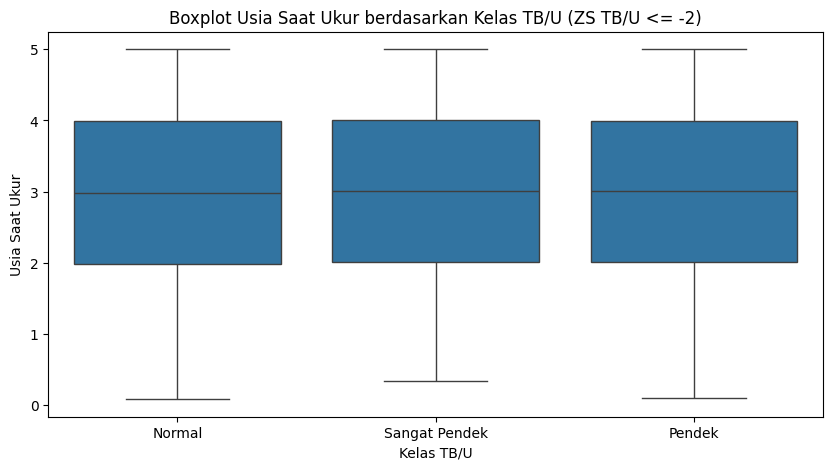

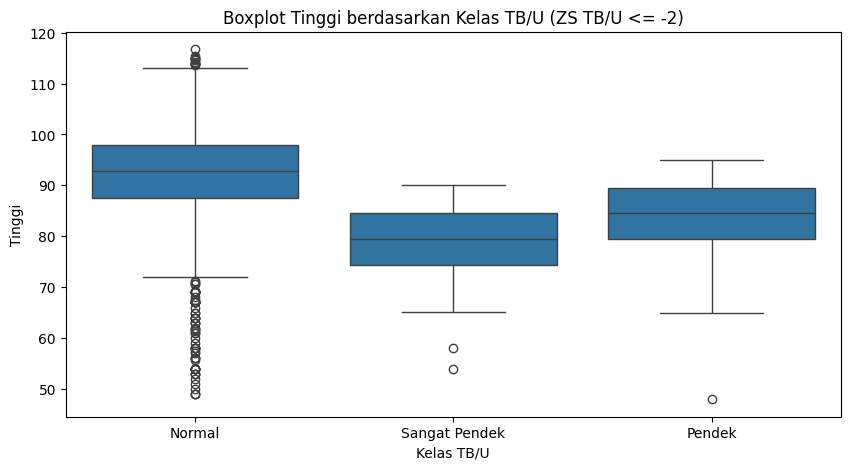

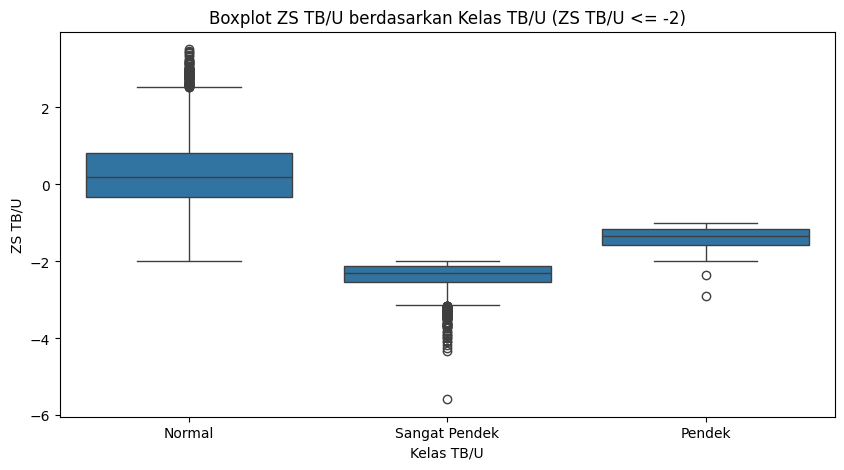

In [ ]:
# Salin data dari test_balance
test_data = test_balance.copy()

# Mengatur ukuran tampilan
plt.figure(figsize=(20, 10))

# Boxplot untuk 'Usia Saat Ukur' berdasarkan kelas TB/U
plt.subplot(1, 3, 1)
sns.boxplot(y='Usia Saat Ukur', data=test_data)
plt.title('Boxplot Usia Saat Ukur berdasarkan Kelas TB/U (ZS TB/U <= -2)')
plt.xlabel('Usia Saat Ukur')

# Boxplot untuk 'Berat' berdasarkan kelas TB/U
plt.subplot(1, 3, 2)
sns.boxplot(y='Tinggi', data=test_data)
plt.title('Boxplot Tinggi berdasarkan Kelas TB/U (ZS TB/U <= -2)')
plt.xlabel('Berat')

# Boxplot untuk 'Tinggi' berdasarkan kelas TB/U
plt.subplot(1, 3, 2)
sns.boxplot(y='Tinggi', data=test_data)
plt.title('Boxplot Tinggi berdasarkan Kelas TB/U (ZS TB/U <= -2)')
plt.xlabel('Tinggi')

# Boxplot untuk 'ZS TB/U' berdasarkan kelas TB/U
plt.subplot(1, 3, 3)
sns.boxplot(y='ZS TB/U', data=test_data)
plt.title('Boxplot ZS TB/U berdasarkan Kelas TB/U (ZS TB/U <= -2)')
plt.xlabel('ZS TB/U')


# Membuat boxplot terpisah untuk setiap kelas dan fitur
for feature in ['Usia Saat Ukur', 'Tinggi', 'ZS TB/U']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='TB/U', y=feature, data=test_data)
    plt.title(f'Boxplot {feature} berdasarkan Kelas TB/U (ZS TB/U <= -2)')
    plt.xlabel('Kelas TB/U')
    plt.ylabel(feature)
    plt.show()

# Evaluating

KNeighborsClassifier(n_neighbors=3)



        Usia Saat Ukur      Berat     Tinggi  bobot classifier
6843          0.583333   8.500000  75.000000          0.000033
6853          0.166667   5.600000  58.000000          0.000033
6855          0.666667   7.900000  73.000000          0.000033
6859          0.083333   4.800000  58.000000          0.000033
6880          0.166667   5.000000  55.700000          0.000033
...                ...        ...        ...               ...
1007392       4.299315  17.443630  91.497392          0.000033
1007394       4.260097  19.092214  90.922274          0.000033
1007398       4.387934  19.151571  90.424031          0.000033
1007433       4.783715  16.024467  92.691906          0.000033
1007470       4.165984  17.337501  91.566903          0.000033

[30769 rows x 4 columns]



               precision    recall  f1-score       support
Normal          0.972456  1.000000  0.986036  14899.000000
Pendek          1.000000  0.986824  0.993368  13585.000000

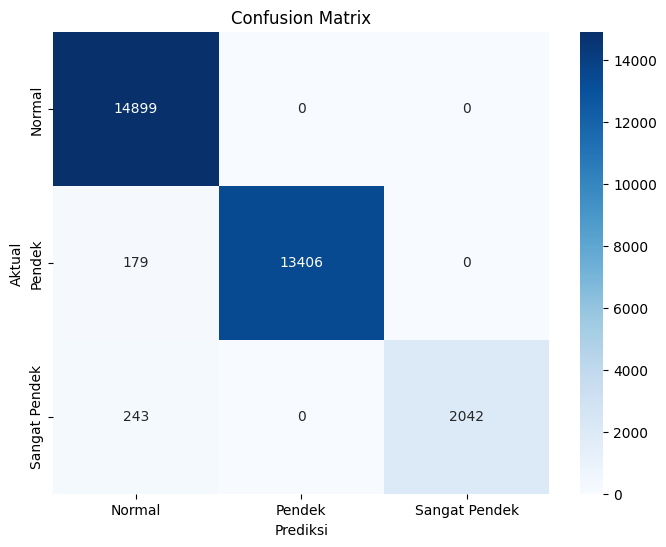

In [ ]:
print(estimators)
print('\n\n')
print(estimator_weights)
print('\n\n')
print(report)

print('\n\n')
print(conf_matrix)
class_names = ['Normal', 'Pendek', 'Sangat Pendek']

# Buat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# Tambahkan judul dan label
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Menampilkan nilai TP, TN, FP dan FN di bawah heatmap
TP = conf_matrix[1][1]
TN = conf_matrix[0][0] + conf_matrix[2][2]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1] + conf_matrix[2][1]

plt.show()